In [1]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
%matplotlib inline

# QR Decomposition Analysis

Here, we will compare the performance of modified Gram-Schmidt, MATLAB's QR algorithm, and Householder Triangularization in accurately reevaluating A = QR. To do so, consider the performance of each algorithm on a variety of different sized matrices as well as on ill-conditioned matrices. Overall, it can be observed that modified Gram-Schmidt computes QR with slightly better accuracy and stability than the other two algorithms. 

In [2]:
# Given an m x n matrix A, where m >= n, computes and returns the matrices Q, R, 
# using the modified Gram-Schmidt orthogonalization procedure, where A = QR, Q 
# is unitary, and R is upper triangular
def modified_gs(A):
    if (len(A.shape) != 2):
        raise ValueError('Input matrix A must be m x n') 
    m = A.shape[0]
    n = A.shape[1]
    if (m < n):
        raise ValueError('Input matrix A must be m x n where m >= n') 
    Q = np.empty((m, m))
    R = np.zeros((m, n))
    I = np.eye(m)
    for j in range(m):
        if (j <= n - 1):
            v_j = A[:, j]
        else:
            v_j = I[:, j]
        for k in range(j):
            q_k = Q[:, k]
            r_kj = np.dot(np.conjugate(q_k), v_j)
            v_j = v_j - (r_kj * q_k)
            if (j <= n - 1):
                R[k, j] = r_kj
        r_jj = np.linalg.norm(v_j)
        Q[:, j] = v_j / r_jj
        if (j <= n - 1):
            R[j, j] = r_jj
    return Q, R

# Given an m x n matrix A and its QR decomposition Q, R, computes and 
# returns the relative l2 error of QR against the ground truth matrix A
def qr_error(A, Q, R):
    truth = A
    computed = Q @ R
    error = np.linalg.norm(truth - computed) / np.linalg.norm(truth)
    return error

In [3]:
# Load in experiment data from MATLAB script qr_compare.m
f = sio.loadmat('data.mat')

# Minimum QR error of MATLAB QR and Householder Triangularization
# for each mxn matrix across all experiments 
min_err1 = f['min_err'][0, :]
min_err2 = f['min_err'][1, :]

# Maximum QR error of MATLAB QR and Householder Triangularization
# for each mxn matrix across all experiments 
max_err1 = f['max_err'][0, :]
max_err2 = f['max_err'][1, :]

# Average QR error of MATLAB QR and Householder Triangularization
# for each mxn matrix across all experiments 
avg_err1 = f['avg_err'][0, :]
avg_err2 = f['avg_err'][1, :]

# Average QR error of MATLAB QR and Householder Triangularization
# for each ill-conditioned matrix across all experiments 
ill_avg1 = f['ill_avg'][0, 0]
ill_avg2 = f['ill_avg'][0, 1]

# Perfrom experiments from qr_compare.m using modified Gram-Schmidt
# Import and use the same data and parameters used in qr_compare.m
all_m = f['all_m'][0]
all_n = f['all_n'][0]
num_exper = f['num_exper'][0][0]
all_A = f['all_A']
ill_A = f['ill_A'] 
m0 = all_m[0]
n0 = all_n[0]
num_m = len(all_m)

# Minimum, maximum, and average QR error of modified Gram-Schmidt
# for each mxn matrix across all experiments 
min_err = np.empty(num_m)
max_err = np.empty(num_m)
avg_err = np.empty(num_m)

# Compute modified Gram-Schmidt error for each mxn matrix 
for i in range(num_m):
    error = np.zeros(num_exper)
    for j in range(num_exper):
        A = all_A[i][j]
        Q, R = modified_gs(A)
        error[j] = qr_error(A, Q, R)
    min_err[i] = np.min(error)
    max_err[i] = np.max(error)
    avg_err[i] = np.average(error)

# Compute modified Gram-Schmidt error and average condition 
# number for each ill-conditioned matrix 
ill_error = np.zeros(num_exper)
conds = np.zeros(num_exper)
for j in range(num_exper):
    A = ill_A[j, :, :] 
    Q, R = modified_gs(A)
    ill_error[j] = qr_error(A, Q, R)
    conds[j] = np.linalg.cond(A)
ill_avg = np.average(ill_error)
avg_cond =np.average(conds)

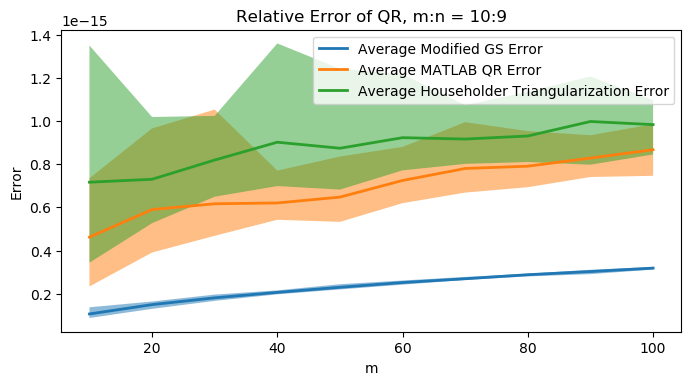

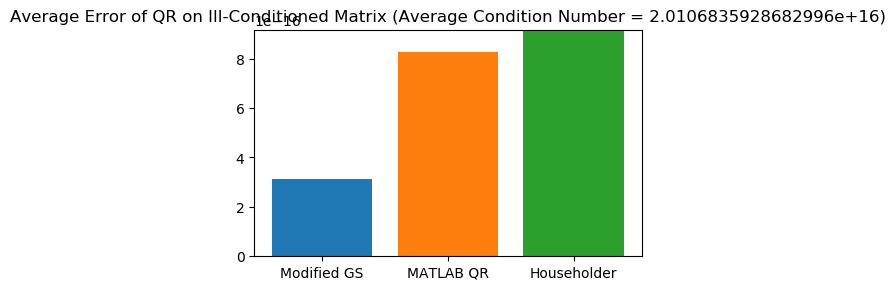

In [4]:
# Plot error
plt.figure(figsize=(8, 4), dpi=100)
plt.title('Relative Error of QR, m:n = {}:{}'.format(m0, n0))

# Modified Gram-Schmidt
plt.plot(all_m, avg_err, lw=2, label='Average Modified GS Error', color='tab:blue')
plt.fill_between(all_m, max_err, min_err, facecolor='tab:blue', alpha=0.5)

# MATLAB QR Algorithm
plt.plot(all_m, avg_err1, lw=2, label='Average MATLAB QR Error', color='tab:orange')
plt.fill_between(all_m, max_err1, min_err1, facecolor='tab:orange', alpha=0.5)

# Householder Triangularization
plt.plot(all_m, avg_err2, lw=2, label='Average Householder Triangularization Error', color='tab:green')
plt.fill_between(all_m, max_err2, min_err2, facecolor='tab:green', alpha=0.5)

plt.xlabel('m')
plt.ylabel('Error')
plt.legend()
plt.show()

# Plot average error for ill-conditioned matrix 
fig, ax = plt.subplots(figsize=(5, 3), dpi=100)
ax.set_title('Average Error of QR on Ill-Conditioned Matrix (Average Condition Number = {})'.format(avg_cond))
ax.bar(np.arange(3), np.array((ill_avg, ill_avg1, ill_avg2)), color=['tab:blue', 'tab:orange', 'tab:green'])
ax.set_xticks(np.arange(3))
ax.set_xticklabels(['Modified GS', 'MATLAB QR', 'Householder'])
plt.show()

# Floating-Point Error Analysis

II. Consider the polynomial at x ∈ [1.920, 2.080] for step-sizes δx = 0.001. 

$$
p(x) = (x − 2)^9 = x^9 − 18x^8 + 144x^7 − 672x^6 + 2016x^5 − 4032x^4 + 5376x^3 − 4608x^2 + 2304x − 512
$$

Notice that computing p(x) using the compact representation of p(x) rather than the expanded representation of p(x) on this interval x results in less error. This can be attributed to the greater accumulation of floating-point error when computing the expanded form of p(x). 

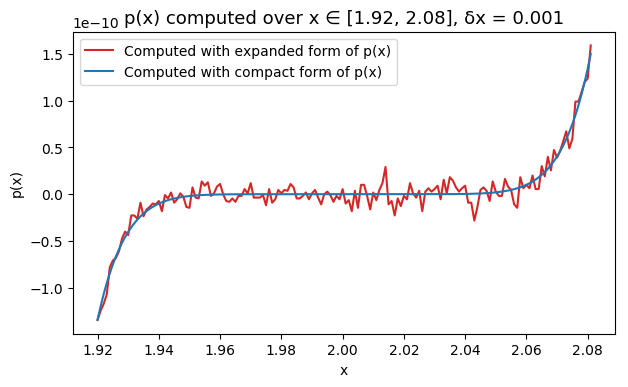

In [5]:
# Expanded form of polynomial p(x)
def poly1(x):
    poly = (x ** 9) - (18 * (x ** 8)) + (144 * (x ** 7)) - (672 * (x ** 6)) + (2016 * (x ** 5)) - \
           (4032 * (x ** 4)) + (5376 * (x ** 3)) - (4608 * (x ** 2)) + (2304 * x) - 512
    return poly

# Compact form of polynomial p(x)
def poly2(x):
    poly = (x - 2) ** 9
    return poly

# Consider p(x) at x ∈ [1.920, 2.080] for step-sizes δx = 0.001
xmin = 1.92
xmax = 2.08
dx = 0.001
x = np.arange(xmin, xmax + dx, dx)

# Compare p(x) computed with expanded form against p(x) computed with compact form
plt.figure(figsize=(7, 4), dpi=100)
plt.title('p(x) computed over x ∈ [{}, {}], δx = {}'.format(xmin, xmax, dx), fontsize=13)
plt.plot(x, poly1(x), label='Computed with expanded form of p(x)', c='tab:red')
plt.plot(x, poly2(x), label='Computed with compact form of p(x)', c='tab:blue')
plt.xlabel('x')
plt.ylabel('p(x)')
plt.legend()
plt.show()

# Matrix Conditioning Analysis

III. Consider the conditioning of a matrix.

(a) First, let us construct random matrices of size m x n where m > n. Here, we will study the condition number as a function of the size of the matrix. Notice how overall, the condition number of the matrix slowly increases as the size of the matrix, m, n, increase. 

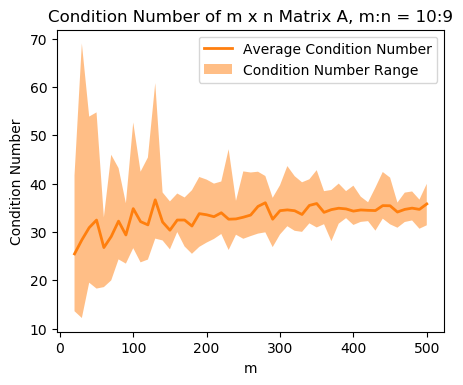

In [6]:
# Choose initial values of m and n, where m0 > n0
# Note: The m:n ratio will remain the same throughout the experiment 
m0 = 10
n0 = 9

# Choose the number of m values to observe 
num_m = 50
all_m = np.arange(1, num_m + 1) * m0 
all_n = np.arange(1, num_m + 1) * n0 

# Choose number of experiments per mxn pairing 
num_exper = 10

min_cond = np.empty(num_m)
max_cond = np.empty(num_m)
avg_cond = np.empty(num_m)

for i, m in enumerate(all_m):
    n = all_n[i]
    conds = np.empty(num_exper)
    for j in range(num_exper):
        A = np.random.randn(m, n)
        conds[j] = np.linalg.cond(A)
    min_cond[i] = np.min(conds)
    max_cond[i] = np.max(conds)
    avg_cond[i] = np.average(conds)
    
# Plot Results
plt.figure(figsize=(5, 4), dpi=100)
plt.title('Condition Number of m x n Matrix A, m:n = {}:{}'.format(m0, n0))
plt.plot(all_m, avg_cond, lw=2, label='Average Condition Number', color='tab:orange')
plt.fill_between(all_m, max_cond, min_cond, label='Condition Number Range', facecolor='tab:orange', alpha=0.5)
plt.xlabel('m')
plt.ylabel('Condition Number')
plt.legend()
plt.show()

(b) For a fixed n, consider the condition number and determinant of a perfectly ill-conditioned n x n matrix A. Let us construct A such that A is a random n x n matrix with a repeated column. Notice that for an ill-conditioned matrix, the condition number and determinant are extremely large values (essentially infinity). 

In [13]:
# Choose n
n = 100

# Construct a random n x n matrix A
A = np.random.randn(n, n)

# Set the last column of A to be its first column 
A[:, -1] = A[:, 0]

# Display the condition number and determinant of A
print('Condition number of A (ill-conditioned)')
print(np.linalg.cond(A))
print()
print('Determinant of A (ill-conditioned)')
print(np.linalg.det(A))

Condition number of A (ill-conditioned)
inf

Determinant of A (ill-conditioned)
-1.6723515729484148e+61


(c) Now, observe what happens to the condition number of our ill-conditioned matrix A as we add noise of varying magnitude to the repeat column of A (the last column of A). When we add essentially no noise to this column, the condition number remains large. However, as we add more noise, A strays from being perfectly ill-conditioned and its condition number decreases as a result.

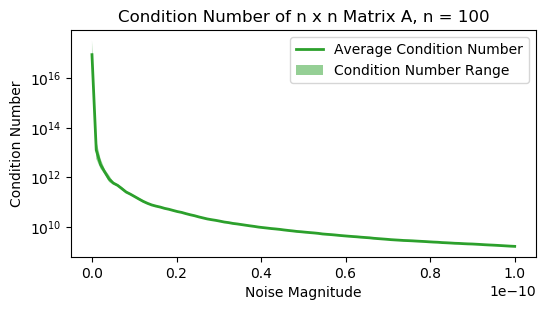

In [14]:
# Define the minimum and maximum noise magnitude to observe 
# as well as the number of noise magnitudes to observe 
min_noise = 1e-16
max_noise = 1e-10
num_noise = 100
noise_magnitudes = np.linspace(min_noise, max_noise, num=num_noise)
conds = np.empty(num_noise)
# Choose number of experiments to perform per noise magnitude
num_exper = 10
min_cond = np.empty(num_noise)
max_cond = np.empty(num_noise)
avg_cond = np.empty(num_noise)

for i, mag in enumerate(noise_magnitudes):
    conds = np.empty(num_exper)
    for j in range(num_exper):
        noise = mag * np.random.rand(n)
        A_noisy = A
        A_noisy[:, -1] += noise
        conds[j] = np.linalg.cond(A_noisy)
    min_cond[i] = np.min(conds)
    max_cond[i] = np.max(conds)
    avg_cond[i] = np.average(conds)
    
# Plot results 
plt.figure(figsize=(6, 3), dpi=100)
plt.title('Condition Number of n x n Matrix A, n = {}'.format(n))
plt.plot(noise_magnitudes, avg_cond, lw=2, label='Average Condition Number', color='tab:green')
plt.fill_between(noise_magnitudes, max_cond, min_cond, label='Condition Number Range', facecolor='tab:green', alpha=0.5)
plt.xlabel('Noise Magnitude')
plt.ylabel('Condition Number')
plt.semilogy()
plt.legend()
plt.show()